In [0]:
import numpy as np
from scipy.spatial.distance import cdist
import math
%matplotlib inline
import matplotlib.pyplot as plt
import copy
from numpy import linalg
import time

def pltt(data, labels, colors, n_grid=-1):
    n_algs = len(data)
    
    x_max = np.zeros(n_algs, np.float64)
    x_min = np.zeros(n_algs, np.float64)
    for k in range(n_algs):
        x_arrays, y_arrays = [], []
        
        if len(data[k])==1:
            y_arrays = data[k][0]
            for i in range(len(y_arrays)):
                x_arrays.append(np.arange(len(y_arrays[i])))
        elif len(data[k])==2:
            x_arrays = data[k][0]
            y_arrays = data[k][1]
            
        for i in range(len(x_arrays)):
            x_max[k] = min(x_arrays[i][-1], x_arrays[i-1][-1])
            x_min[k] = max(x_arrays[i][0], x_arrays[i-1][0])
    
    x_min=max(x_min)
    x_max=min(x_max)
    
    n_grid=6
    x_grid = np.linspace(x_min, x_max, n_grid)
    
    y_mean = np.zeros((n_algs, n_grid), np.float64)
    y_max = np.zeros((n_algs, n_grid), np.float64)
    y_min = np.zeros((n_algs, n_grid), np.float64)
    std_dev=np.zeros_like(y_mean)
    
    for k in range(n_algs):
        x_arrays, y_arrays = [], []
        
        if len(data[k])==1:
            y_arrays = data[k][0]
            for i in range(len(y_arrays)):
                x_arrays.append(np.arange(len(y_arrays[i])))
        elif len(data[k])==2:
            x_arrays = data[k][0]
            y_arrays = data[k][1]
        x_arrays, y_arrays = np.array(x_arrays), np.array(y_arrays)
        
        
        n=len(x_arrays) 
        
        y_interp = np.zeros((n, n_grid), np.float64)
        mask_array = []
        for i in range(n):
            mask = (x_arrays[i] >= x_min)*(x_arrays[i] <= x_max)
            mask_array.append(mask)
        
        for i in range(n):
            y_interp[i] = np.interp(x_grid, (x_arrays[i])[mask_array[i]], (y_arrays[i])[mask_array[i]])
            y_mean[k]+=y_interp[i]
        
        y_mean[k]/=n
        
        ### max-min var ###
        #y_max[k] = y_interp.max(axis=0)
        #y_min[k] = y_interp.min(axis=0)
        
        for i in range(n):
            std_dev[k] += (y_interp[i] - y_mean[k])**2
        std_dev[k] /= (n-1)
        std_dev[k] = np.sqrt(std_dev[k])
        #y_max[k] = y_mean[k] + std_dev[k]
        #y_min[k] = y_mean[k] - std_dev[k]
        #f_opt = min(y_min[k].min(), y_min[k-1].min())
    f_opt = y_mean.min()
    #y_mean-=f_opt

    ### std var ###
    y_max = y_mean + std_dev
    y_min = y_mean - std_dev
    
    
    
    fig, ax = plt.subplots()
    for k in range(n_algs):
        ax.plot(x_grid, y_mean[k], color= colors[k], label=labels[k])
        ax.fill_between(x_grid, y_min[k], y_max[k], color=colors[k], alpha=0.3, linewidth=0)
        
    ax.set_xlabel(r'1/$\varepsilon$, ')
    ax.set_ylabel('required time')
    leg = ax.legend();
    ax.grid(axis='both')

    #plt.grid(True)
    plt.savefig('/content/drive/My Drive/colab/ACC-SIN-std.png', dpi=200, bbox_extra_artists=(leg, ax), bbox_inches='tight')



In [9]:
x_array = np.linspace(1/2e-2, 1/4e-4, 6)

array([  50.,  540., 1030., 1520., 2010., 2500.])

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_to_compare = []
n_algs = 6
for i in range(n_algs):
    #data_to_compare.append([[]])
    data_to_compare.append([[],[]])
    

for k in range(5):
    ### AGM ###
    data_to_compare[0][0].append(x_array)
    y_array = np.load('/content/drive/My Drive/colab/'+'agm_'+str(k)+'.npy')
    #y_array = np.log(y_array)
    data_to_compare[0][1].append(y_array)
    
    ### green ###
    data_to_compare[1][0].append(x_array)
    y_array = np.load('/content/drive/My Drive/colab/'+'green_'+str(k)+'.npy')    
    #y_array = np.log(y_array)
    data_to_compare[1][1].append(y_array)
    
    
    ### AAM ###
    data_to_compare[2][0].append(x_array)
    y_array = np.load('/content/drive/My Drive/colab/'+'aam_'+str(k)+'.npy')    
    #y_array = np.log(y_array)
    data_to_compare[2][1].append(y_array)

    ### APD ###
    data_to_compare[3][0].append(x_array)
    y_array = np.load('/content/drive/My Drive/colab/'+'apd_'+str(k)+'.npy')    
    #y_array = np.log(y_array)
    data_to_compare[3][1].append(y_array)

    

    ### aar-dcd ###
    data_to_compare[4][0].append(x_array)
    y_array = np.load('/content/drive/My Drive/colab/'+'aar_'+str(k)+'.npy')    
    #y_array = np.log(y_array)
    data_to_compare[4][1].append(y_array)

    
    ### SIN ###
    data_to_compare[5][0].append(x_array)
    y_array = np.load('/content/drive/My Drive/colab/'+'sin_'+str(k)+'.npy')    
    #y_array = np.log(y_array)
    data_to_compare[5][1].append(y_array)
    

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


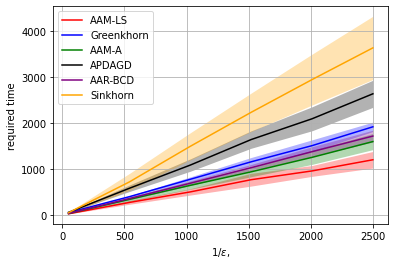

In [0]:
labels=['AAM-LS', 'Greenkhorn', 'AAM-A', 'APDAGD', 'AAR-BCD', 'Sinkhorn'] 
colors=['red', 'blue', 'green', 'black', 'purple', 'orange']

pltt(data_to_compare, labels=labels, colors=colors)
